In [1]:
### Developer Laltu Gazi

import ROOT as r

Welcome to JupyROOT 6.30/04


In [2]:
import matplotlib.pyplot as plt

Event number i and tμ: 0 0
Event number i and tμ: 100 -4.8877118388190866e-05
Event number i and tμ: 200 -0.0005878570664208382
Event number i and tμ: 300 3.086718352060416
Event number i and tμ: 400 -8.442098624072969e-05
Event number i and tμ: 500 -8.268463716376573e-06
Event number i and tμ: 600 -0.00035911959275836125
Event number i and tμ: 700 0.44707131802715594
Event number i and tμ: 800 -0.0006554710053023882
Event number i and tμ: 900 -9.180691267829388e-05
[#0] WARNING:InputArguments -- The parameter 'sigma' with range [-inf, inf] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:ObjectHandling -- RooWorkspace::import() importing dataset shape1Data
[#1] INFO:ObjectHandling -- RooWorkSpace::import() changing name of dataset from  shape1Data to data_null

RooWorkspace()  contents

variables
---------
(bkgfrac,l,l1,mu,mu1,sigma,sigma1,x)

p.d.f.s
-------
RooGaussian::gauss[ x=x mean=mu sigma=sigma ] = 1
RooGaussian::gauss1[ x=x m

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



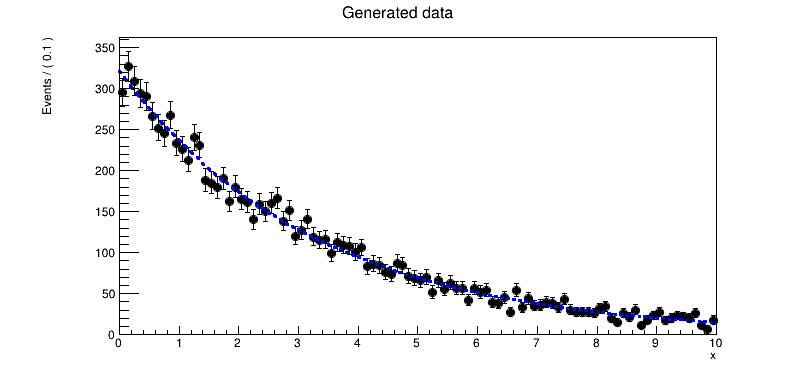

In [3]:
nexperiments = 1000
t_μ_arr1 = []
tμ = 0
histogram = r.TH1F("histogram", "Sample Histogram;X-axis;Y-axis", 50, -.010, 10)


for i in range(nexperiments):
    if i%100==0:
        print("Event number i and tμ:",i,tμ)
    wspace = r.RooWorkspace()   


    wspace.factory("Gaussian::gauss(x[0,10],mu[5],sigma[.5])")    ### sigma model                                   
    wspace.factory("Exponential::shape(x,l[-.3,-5,5])")   ### bkg model
#

    wspace.factory("SUM::model2(bkgfrac[.9,0.5,1.0]*shape,gauss)");  ### signal + bkg model
#                             
    wspace.factory("Exponential::shape1(x,l1[-.3,-5,5])")   
    
    ## Generate data following the bkg distribution
    data_null = wspace.pdf("shape1").generate(r.RooArgSet(wspace.var("x")), 10000)
    getattr(wspace, 'import')(data_null, r.RooFit.Rename("data_null")) 

    x = wspace.var("x")
    model_data = wspace.pdf("model2")
    bkgonly_model = wspace.pdf("shape1")

    gauss = wspace.pdf("gauss")                                                                                     
    shape = wspace.pdf("shape")                                                                                     
                                                                                                                                                      
                                                                                                        
    wspace.Print()  
    ### frame on which data/fits are plotted
    xframe2 = x.frame(r.RooFit.Title("Generated data"))   

    ### fit the data with the s+b model 
    result_null = model_data.fitTo(data_null,r.RooFit.Save())
    data_null.plotOn(xframe2)
    model_data.plotOn(xframe2,r.RooFit.LineColor(r.kRed),r.RooFit.LineStyle(r.kDashed))

    ### fit the data with the b model
    result = bkgonly_model.fitTo(data_null,r.RooFit.Save())
    bkgonly_model.plotOn(xframe2,r.RooFit.LineColor(r.kBlue),r.RooFit.LineStyle(r.kDashed))

    c2 = r.TCanvas("Exercise02","Exercise02",800,400) 
    r.gPad.SetLeftMargin(0.15) ; xframe2.GetYaxis().SetTitleOffset(1.6) ; xframe2.Draw() ;  
    c2.Draw() 

    ### get the likelihood using  result.minNll() and then calculate the ratios etc
    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


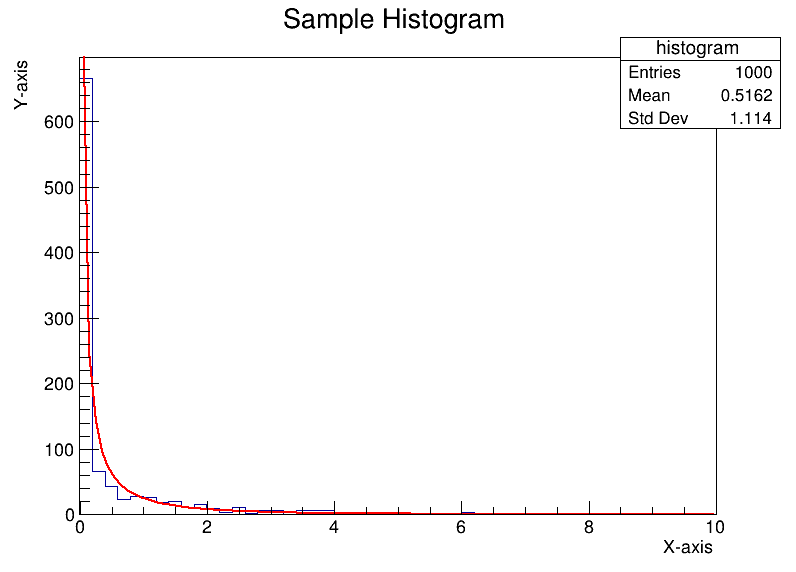

In [8]:
#histogram.SetBinContent(1, 0)
c1 = r.TCanvas("c1", "All the Histogram", 800, 600)
histogram.Draw()
c1.Draw()

### Save it in a root file
outfile = r.TFile("tvaldist.root","RECREATE")
histogram.Write()
outfile.Write()
outfile.Close()

In [ ]:

def chi2_func(x, par):
    # ROOT's TF1 needs a C-style function, this is a wrapper around the scipy.stats.chi2 PDF
    from scipy.stats import chi2
    return par[0] * chi2.pdf(x[0], df=par[1])
def delta_func(x, par):
    return par[2] * r.TMath.Gaus(x[0], par[3], par[4], True)
# Define the combined function
def combined_func(x, par):
    return chi2_func(x, par) + delta_func(x, par)

# Create a TF1 object for the combined function
combined_fit = r.TF1("combined_fit", combined_func, 0, 10, 5)
combined_fit.SetParameters(.5, 4, .5, 0, 0.1)  # Initial guess for parameters: normalization1, df, normalization2, mean, sigma

# Perform the fit
histogram.Fit(combined_fit, "RI")

# Draw the histogram and the fit result
c1 = r.TCanvas("c1", "Combined Fit", 800, 600)
histogram.Draw()
combined_fit.Draw("same")
c1.Draw()


# End here